<a href="https://colab.research.google.com/github/idarapatrick/Peer-Group-6-Math-For-ML/blob/main/Template_PCA_Formative_1_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

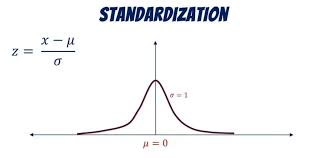


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("DatasetAfricaMalaria.csv")

new_data = data[["Country Name", "Year", "Malaria cases reported", "Urban population (% of total population)", "Rural population (% of total population)"]]
new_data = new_data.fillna(0)
new_data = new_data[new_data["Year"] == 2010].reset_index(drop=True)
new_data.describe()

,Year,Malaria cases reported,Urban population (% of total population),Rural population (% of total population)
count,54.0,5.400000e+01,54.000000,54.000000
mean,2010.0,4.108289e+05,42.206667,57.794074
std,0.0,5.930371e+05,17.886950,17.887274
min,2010.0,0.000000e+00,10.640000,14.470000
25%,2010.0,1.250000e+01,29.040000,44.920000
50%,2010.0,4.346450e+04,40.060000,59.940000
75%,2010.0,7.835435e+05,55.080000,70.960000
max,2010.0,2.417780e+06,85.530000,89.360000


In [5]:
# Calculate the mean of 'Malaria cases reported'
mean_malaria_cases = new_data["Malaria cases reported"].mean()
print(f"The mean of Malaria cases reported is: {mean_malaria_cases}")

# Create the "Malaria Intensity" column based on the condition
new_data["Malaria Intensity"] = (new_data["Malaria cases reported"] > mean_malaria_cases).astype(int)

display(new_data.head(10))

The mean of Malaria cases reported is: 410828.8888888889


,Country Name,Year,Malaria cases reported,Urban population (% of total population),Rural population (% of total population),Malaria Intensity
0,Algeria,2010,1.0,67.54,32.46,0
1,Angola,2010,1682870.0,59.78,40.22,1
2,Benin,2010,0.0,43.09,56.91,0
3,Botswana,2010,1046.0,62.41,37.59,0
4,Burkina Faso,2010,804539.0,24.63,75.37,1
5,Burundi,2010,1763447.0,10.64,89.36,1
6,Cabo Verde,2010,47.0,61.82,38.18,0
7,Cameroon,2010,0.0,51.56,48.44,0
8,Central African Republic,2010,0.0,38.90,61.10,0
9,Chad,2010,200448.0,21.99,78.02,0


In [6]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
features_to_standardize = new_data[["Malaria cases reported", "Urban population (% of total population)", "Rural population (% of total population)"]].values
mean = np.mean(features_to_standardize, axis=0)
std_dev = np.std(features_to_standardize, axis=0)
standardized_data = (features_to_standardize - mean) / std_dev

print("Standardized Data:")
display(standardized_data[:5])  # Display the first few rows of standardized data

Standardized Data:


array([[-0.69925726,  1.42960151, -1.42961738],
       [ 2.16510125,  0.99169199, -0.99171581],
       [-0.69925896,  0.04984795, -0.04988884],
       [-0.69747859,  1.1401072 , -1.14012832],
       [ 0.67012162, -0.9918801 ,  0.99182031]])

In [7]:
# Check the mean and standard deviation of the standardized data
mean_standardized = np.mean(standardized_data, axis=0)
std_dev_standardized = np.std(standardized_data, axis=0)

print("Mean of standardized data:", mean_standardized)
print("Standard deviation of standardized data:", std_dev_standardized)

Mean of standardized data: [-6.16790569e-18 -1.97372982e-16 -8.01827740e-17]
Standard deviation of standardized data: [1. 1. 1.]


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [9]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
display(cov_matrix)

array([[ 1.01886792, -0.40305823,  0.40302543],
       [-0.40305823,  1.01886792, -1.01886791],
       [ 0.40302543, -1.01886791,  1.01886792]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [10]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
display((eigenvalues, eigenvectors))

(array([2.29276796e+00, 7.63835800e-01, 1.03330195e-08]),
 array([[-4.08416554e-01,  9.12795660e-01,  2.69916883e-05],
        [ 6.45446924e-01,  2.88774513e-01,  7.07112120e-01],
        [-6.45441080e-01, -2.88813717e-01,  7.07101442e-01]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [11]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
display(sorted_eigenvectors)

array([[-4.08416554e-01,  9.12795660e-01,  2.69916883e-05],
       [ 6.45446924e-01,  2.88774513e-01,  7.07112120e-01],
       [-6.45441080e-01, -2.88813717e-01,  7.07101442e-01]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.